In [1]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords

import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [26]:
data = pd.read_csv('/content/Book1sentileft (1).csv')
data.head()

,location,category,text,polarity
0,Dubai,poi,Costas in the lobby deliver,5
1,Dubai,poi,Sheikh Mohammed Center For Cultural Understand...,5
2,Dubai,poi,Too hot for summer....... Nuthin refreshin in ...,10
3,Dubai,poi,Meh I expected more .,5
4,Dubai,poi,Please treat the animals with respect! And if ...,0


In [27]:
def get_sentiment(polarity):
    return +1 if polarity > 3 else -1

# apply the get_sentiment method on the rating column and save to a new sentiment column
data['sentiment'] = data.apply(lambda row : get_sentiment(row['polarity']), axis=1)
data.head()

,location,category,text,polarity,sentiment
0,Dubai,poi,Costas in the lobby deliver,5,1
1,Dubai,poi,Sheikh Mohammed Center For Cultural Understand...,5,1
2,Dubai,poi,Too hot for summer....... Nuthin refreshin in ...,10,1
3,Dubai,poi,Meh I expected more .,5,1
4,Dubai,poi,Please treat the animals with respect! And if ...,0,-1


In [0]:
import re
# cleaning html symbols from the sentence
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [0]:

# cleaning punctuations from the sentence
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [30]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = stopwords.words('english')
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [77]:
from nltk.stem import SnowballStemmer # Stemmers remove morphological affixes from words, leaving only the word stem.
snow = SnowballStemmer('english') 
print(snow.stem('waiting'))

wait


In [0]:
i = 0
string1 = ' '
final_string = []
all_positive_words = []                   # store words from +ve reviews here
all_negative_words = []                   # store words from -ve reviews here.
s = ''

for sent in data['text'].values:
    filtered_sentence = []
    sent = cleanhtml(sent)
    sent = cleanpunc(sent)
    for w in sent.split():
        if((w.isalpha()) and (len(w)>2)):  
            if(w.lower() not in stop):    # If it is a stopword
                s = (snow.stem(w.lower())).encode('utf8')
                filtered_sentence.append(s)
                if (data['sentiment'].values)[i] == '1':
                    all_positive_words.append(s)
                if(data['sentiment'].values)[i] == '-1':
                    all_negative_words.append(s)
            else:
                continue
        else:
            continue 
    string1 = b" ".join(filtered_sentence) 
    final_string.append(string1)
    i += 1

In [78]:
data['CleanedText'] = final_string
data.head(3)

text  ...                                        CleanedText
Dubai poi                        Costas in the lobby deliver  ...                               b'costa lobbi deliv'
      poi  Sheikh Mohammed Center For Cultural Understand...  ...  b'sheikh moham center cultur understand must v...
      poi  Too hot for summer....... Nuthin refreshin in ...  ...                     b'hot summer nuthin refreshin'

[3 rows x 3 columns]

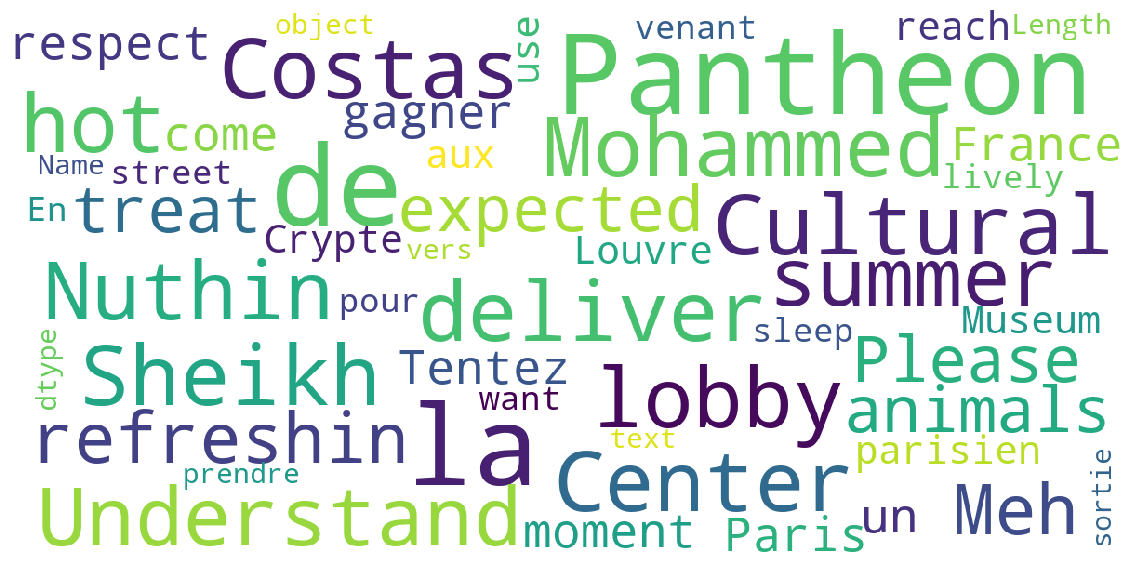

In [0]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data["Cleanedtext"])

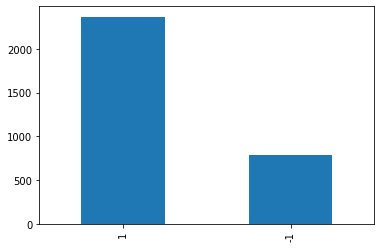

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

data['sentiment'].value_counts().plot(kind="bar")
plt.show()

In [0]:
# check the number of positive vs. negative tagged sentences
positives = data['sentiment'][data.sentiment == 1]
negatives = data['sentiment'][data.sentiment == -1]
print('number of positve tagged sentences is:  {}'.format(len(positives)))
print('number of negative tagged sentences is: {}'.format(len(negatives)))
print('total length of the data is:            {}'.format(data.shape[0]))

number of positve tagged sentences is:  2368
number of negative tagged sentences is: 788
total length of the data is:            3156


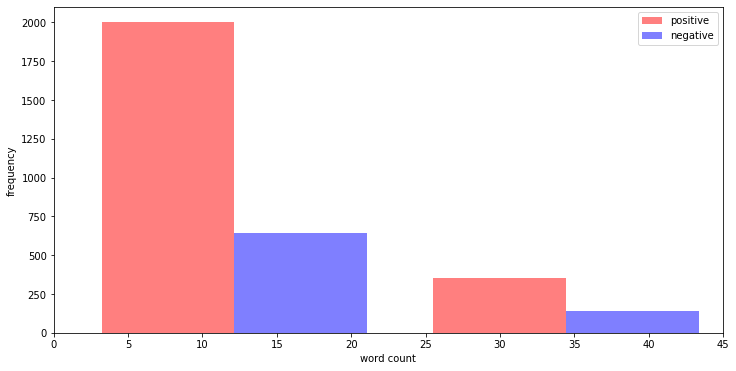

In [0]:
# plot word count distribution for both positive and negative sentiments
x = data['word count'][data.sentiment == 1]
y = data['word count'][data.sentiment == -1]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['r','b'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [20]:
# get most common words in training dataset
import collections
all_words = []
for line in list(df_listings['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
collections.Counter(all_words).most_common(10)

[('the', 2134),
 ('to', 1123),
 ('a', 891),
 ('and', 845),
 ('in', 648),
 ('is', 617),
 ('of', 570),
 ('you', 559),
 ('for', 548),
 ('at', 338)]

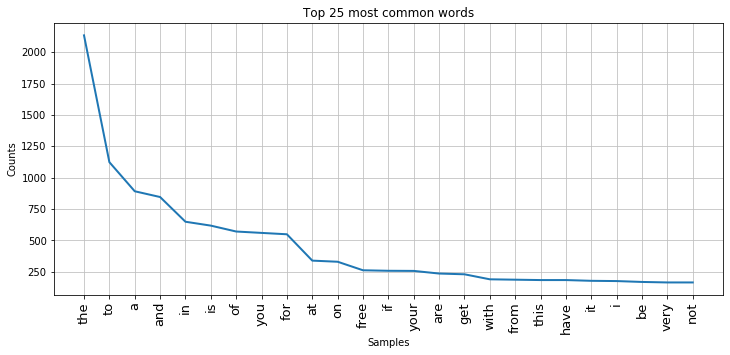

Text(0.5, 1.0, 'log-log plot of words frequency')

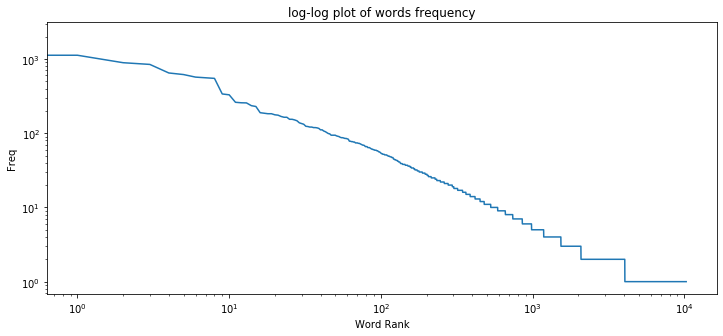

In [21]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log plot
word_counts = sorted(collections.Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
data['CleanedText'].values

array([b'costa lobbi deliv',
       b'sheikh moham center cultur understand must visit',
       b'hot summer nuthin refreshin', ...,
       b'live street want sleep area come nice an simpl welcom hotel',
       b'venant pour prendr sorti ver mettr bien milieu',
       b'vous partez vous pouvez signal vos arian qui seront par les ambassad afin vous contact des secour venaient \xc3\xa3\xc2\xaatre'],
      dtype=object)

In [0]:
uni_gram = CountVectorizer()
uni_gram_vectors = uni_gram.fit_transform(data['CleanedText'].values)

In [0]:
import pickle
def saveindisk(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"), protocol=4)
def openfromdisk(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp
saveindisk(uni_gram_vectors,"uni_gram")

In [0]:
#Loading the variable from file
uni_gram_vectors = openfromdisk("uni_gram")

In [40]:
uni_gram_vectors.shape[1]

5722

In [41]:

uni_gram_vectors[0]

<1x5722 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [0]:
bi_gram = CountVectorizer(ngram_range=(1,2))
bi_gram_vectors = bi_gram.fit_transform(data['CleanedText'].values)

In [0]:
saveindisk(bi_gram_vectors,"bi_gram")

In [0]:
bi_gram_vectors = openfromdisk("bi_gram")

In [45]:
bi_gram_vectors.shape

(3208, 22413)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
tfidf_vec = tfidf.fit_transform(data['CleanedText'])

In [0]:
saveindisk(tfidf_vec,"tfidf")

In [0]:
tfidf_vec = openfromdisk("tfidf")

In [49]:

tfidf_vec.shape

(3208, 22413)

In [0]:

# Function to split train and test set by time

def train_test_split_by_time(X, y, test_ratio = 0.3):
    """
    y parameter needs to be a pandas series
    with timestamp as its index
    """
    
    train_ratio = 1 - test_ratio
    train_end = int(train_ratio * len(y))
    
    sorted_index = y.index.argsort()
    train_index = sorted_index[:train_end]
    test_index = sorted_index[train_end:]
    
    try:
        return X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    except KeyError:
        # if X is a pandas data structure
        return X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

In [0]:

# function to perform grid-search
def GridSearch(clf, param_grid, X, y, test_size=0.3, cv=10, n_jobs=-1,
                 random_search=False, n_iter=10, return_train_score=False):
    """
    Splits the data using time based slicing
    Performs grid search to search for optimal parameter
    using exaustive or random search
    Print accuracy and classification report with
    best parameter on test set
    """
    
    # time based splitting of dataset
    X_train, X_test, y_train, y_test = train_test_split_by_time(X, y, test_size)
    
    if random_search:
        grid_search = RandomizedSearchCV(clf, param_grid, n_iter=n_iter, 
                                         n_jobs=n_jobs, verbose=1, cv=cv, 
                                         return_train_score=return_train_score)
    else:
        grid_search = GridSearchCV(clf, param_grid, n_jobs=n_jobs, 
                                   verbose=1, cv=cv, 
                                   return_train_score=return_train_score)
    
    print('Performing grid search...\n')
    print('Parameters:')
    print(param_grid)
    print()
    
    grid_search.fit(X_train, y_train)
    print('\n')
    
    print("Best CV score: %f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(param_grid.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    print("\nTest score with best_estimator_: %f" % grid_search.best_estimator_.score(X_test, y_test))
    print("\n              Classification Report Test Data")
    print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))
    
    return grid_search

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [54]:

bi_gram = CountVectorizer(min_df=10)
bi_gram_vectors = bi_gram.fit_transform(data['CleanedText'])
bi_gram_vectors.shape

(3208, 482)

In [0]:
# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(bi_gram_vectors,df_listings['sentiment'])

In [57]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
y_pred = clf.predict(X_test)

print('Accuracy on test set:', accuracy_score(y_test, y_pred))
print('\n   Classification Anaylsis')
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.7543640897755611

   Classification Anaylsis
              precision    recall  f1-score   support

          -1       0.58      0.35      0.44       218
           1       0.79      0.90      0.84       584

    accuracy                           0.75       802
   macro avg       0.68      0.63      0.64       802
weighted avg       0.73      0.75      0.73       802



In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import TimeSeriesSplit

clf = SVC()
param_grid = {'gamma':[1,0.5,0.1,0.05],
             'C':[1,0.5,0.1,0.05]} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   19.6s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 0.05],
                         'gamma': [1, 0.5, 0.1, 0.05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [0]:
# news_classifier.py
import pickle
import csv
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

class NewsClassification:
    def __init__(self):
        self.train_data = []
        self.train_labels = []
        self.test_data = []
        self.test_labels = []

        self.train_vectors = None
        self.test_vectors = None
        self.vectorizer = TfidfVectorizer()
        self.model = None

    def prepare_feature_vectors(self):
        # Train the feature vectors
        self.train_vectors = self.vectorizer.fit_transform(self.train_data)
        # Apply model on test data
        # : since they have already been fit to the training set
        self.test_vectors = self.vectorizer.transform(self.test_data)

    def prepare_model(self):
        self.model = svm.SVC(kernel='linear', class_weight="balanced")
        self.model.fit(self.train_vectors, self.train_labels)


if __name__ == '__main__':
    news_classifier = NewsClassification()
    data = pd.read_csv(
        '/content/Book1sentileft (1).csv',
        names=['text', 'sentiment'], dtype={'label': object})

    data = data[data['sentiment'].map(len) <= 2]
    train, test = train_test_split(data, test_size=0.1)

    news_classifier = NewsClassification()
    news_classifier.train_data, news_classifier.train_labels =\
        train['text'], train['sentiment']
    news_classifier.test_data, news_classifier.test_labels =\
        test['text'], test['sentiment']

    news_classifier.prepare_feature_vectors()
    news_classifier.prepare_model()

In [0]:
# cross validation score for SVM
svm_model = svm.SVC(kernel='linear')
print(cross_val_score(svm_model, news_classifier.train_vectors,
        news_classifier.train_labels,cv=10, scoring='accuracy').mean())

0.8052904429907801


In [72]:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
              precision    recall  f1-score   support

          -1       0.81      0.19      0.31       218
           1       0.77      0.98      0.86       584

    accuracy                           0.77       802
   macro avg       0.79      0.59      0.59       802
weighted avg       0.78      0.77      0.71       802



In [0]:
import pandas as pd
location = pd.Series(['Dubai','London','Rome','Paris','Berlin','Amsterdam'])
Dubai = pd.Series([478,4,25,0,0,837,10,30,27,7,696])
London = pd.Series([155,6,13,12,19,353,20,10,7,4,191])
Rome = pd.Series([24,1,1,0,0,56,0,0,8,0,41])
Paris = pd.Series([34,12,26,18,16,49,14,24,13,12,31])
Berlin = pd.Series([39,11,17,6,6,15,4,4,4,3,15])
Amsterdam = pd.Series([12,9,11,10,2,37,3,6,11,6,17])

In [0]:
variables = dict(Dubai = Dubai, London = London, 
                Rome =Rome, Paris = Paris,Berlin  =Berlin , 
                 Amsterdam  = Amsterdam  )

In [0]:
horsekick = pd.DataFrame(variables, columns = ['Dubai', 
                                                    'London', 'Rome', 
                                                    'Paris', 'Berlin', 
                                                    'Amsterdam'])

In [0]:
horsekick.index = ['polarity_0','polarity_1','polarity_2', 'polarity_3', 
                     'polarity_4', 'polarity_5','polarity_6','polarity_7','polarity_8','polarity_9','polarity_10']

In [83]:
horsekick

,Dubai,London,Rome,Paris,Berlin,Amsterdam
polarity_0,478,155,24,34,39,12
polarity_1,4,6,1,12,11,9
polarity_2,25,13,1,26,17,11
polarity_3,0,12,0,18,6,10
polarity_4,0,19,0,16,6,2
polarity_5,837,353,56,49,15,37
polarity_6,10,20,0,14,4,3
polarity_7,30,10,0,24,4,6
polarity_8,27,7,8,13,4,11
polarity_9,7,4,0,12,3,6
